<a href="https://colab.research.google.com/github/nattapongbam/229352-StatisticalLearning681/blob/main/Copy_of_Lab07_Boosted_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Boosted tree models on a simulated dataset

- [AdaBoostClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn-ensemble-adaboostclassifier)
- [XGBClassifier documentation](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)
- [LGBMClassifier documentation](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm-lgbmclassifier)
- [GridSeachCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


- [Data](https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip)


Perform GridSearchCV of the following three models on the provided training set (`X_train.csv` and `y_train.csv`)

1. Evaluate these models on the test set (`X_test.csv` and `y_test.csv`). **Keep searching (using cross-validation) until you find the model that achieves > 0.83 out-of-fold accuracy (use `GridSeachCV.best_score_` to obtain the out-of-fold accuracy)**

2. Report the test accuracy of your best model.

3. For each model, plot the feature importances

For `AdaBoostClassifier`, feature importances can be obtained by calling the `feature_importances_` attribute after fitting the model.

For `XGBClassifier` and `LGBMClassifier`, feature importances can be obtained using the library’s `plot_importance` function. Here is a minimal example in XGBoost:

In [1]:
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

In [13]:
from sklearn.ensemble import AdaBoostClassifier


ab = AdaBoostClassifier()
ab.fit(X, y)
ab.feature_importances_

array([0.        , 0.05832968, 0.39886369, 0.54280663])

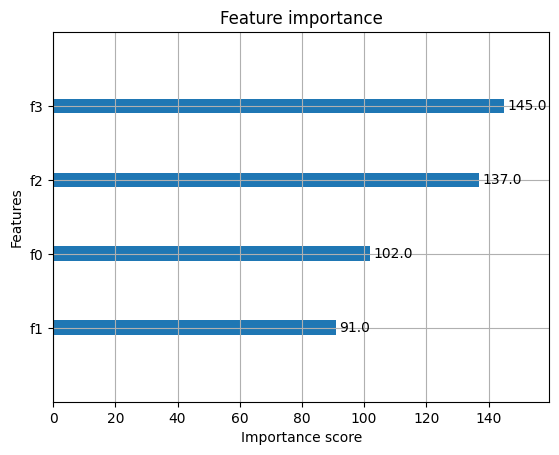

In [55]:
from xgboost import XGBClassifier, plot_importance


model = XGBClassifier()
model.fit(X, y)
plot_importance(model);

In [ ]:
X

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


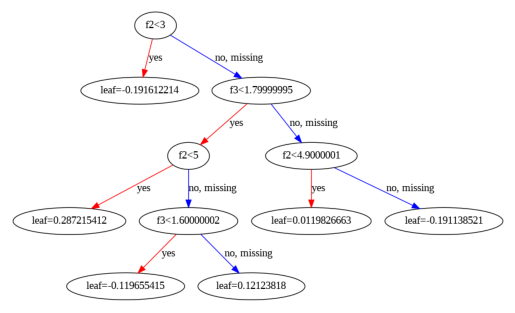

In [16]:
from xgboost import plot_tree

plot_tree(model, num_trees=4);

In [ ]:
import pandas as pd

X_train = pd.read_csv('X_train.csv', header=None)
X_train

In [10]:
x_test = pd.read_csv('X_test.csv', header=None)
y_train = pd.read_csv('y_train.csv', header=None)
y_test = pd.read_csv('y_test.csv', header=None)

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ad = AdaBoostClassifier(random_state=42)
params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 1, 2]}

ad_grid = GridSearchCV(ad, params, cv=3, scoring='accuracy')
ad_grid.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 1, 2],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [28]:
from sklearn.metrics import classification_report

y_pred = ad_grid.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.76      0.78        41
         1.0       0.81      0.86      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [25]:
from xgboost import XGBClassifier, plot_importance
xg = XGBClassifier(booster='gbtree')
params = {'max_depth': [3, 5, 10], 'learning_rate': [0.1, 1, 2]}

xg_grid = GridSearchCV(xg, params, cv=3, scoring='accuracy')
xg_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 1, 2], 'max_depth': [3, 5, 10]},
             scoring='accuracy')

In [26]:
y_pred_xg = xg_grid.predict(x_test)
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84        41
         1.0       0.89      0.82      0.85        50

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [ ]:
from lightgbm import LGBMClassifier, plot_importance

lt = LGBMClassifier() #force_row_wise=True
params = {'max_depth': [1,2], 'min_split_gain':[3, 5]}

lt_grid = GridSearchCV(lt, params, cv=3, scoring='accuracy')
lt_grid.fit(X_train, y_train)

In [49]:
y_pred_lt = lt_grid.predict(x_test)
print(classification_report(y_test, y_pred_lt))

              precision    recall  f1-score   support

         0.0       0.79      0.76      0.78        41
         1.0       0.81      0.84      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



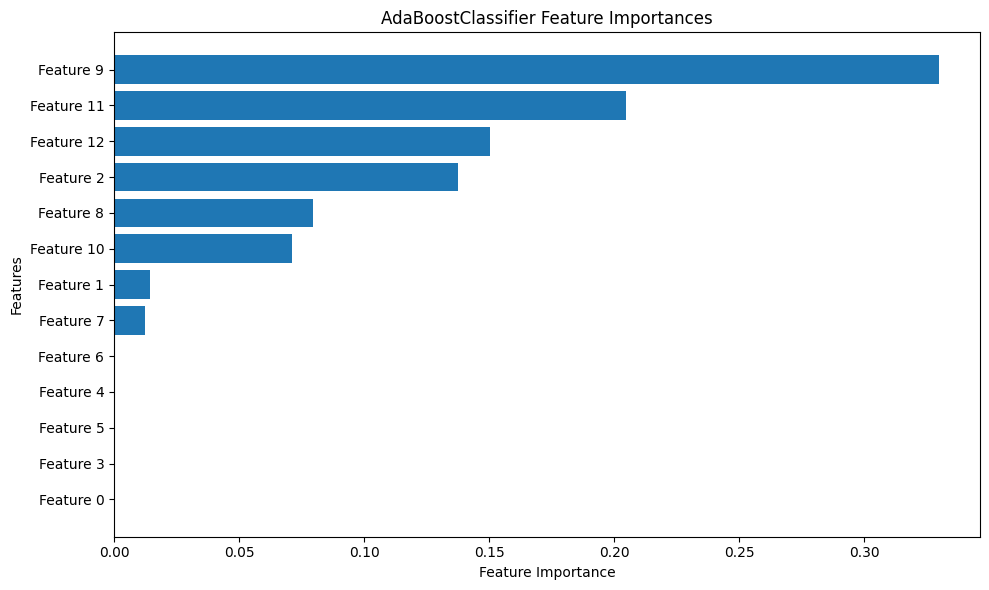

In [51]:
import matplotlib.pyplot as plt
import numpy as np

ad_importances = ad_grid.best_estimator_.feature_importances_

feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

sorted_idx = ad_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx], ad_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("AdaBoostClassifier Feature Importances")
plt.tight_layout()
plt.show()

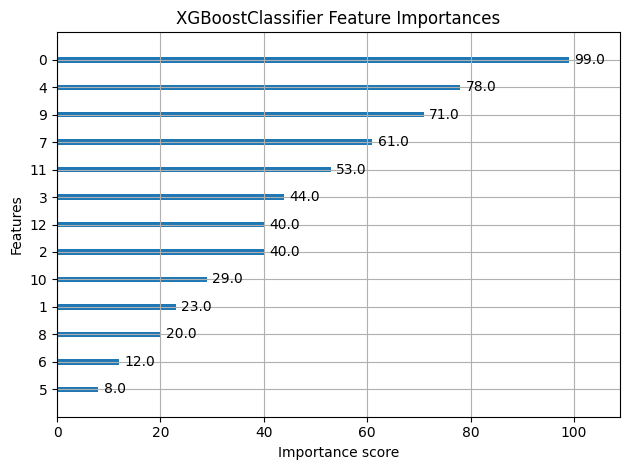

In [53]:
import xgboost as xgb
import matplotlib.pyplot as plt

xgb.plot_importance(xg_grid.best_estimator_)
plt.title("XGBoostClassifier Feature Importances")
plt.tight_layout()
plt.show()

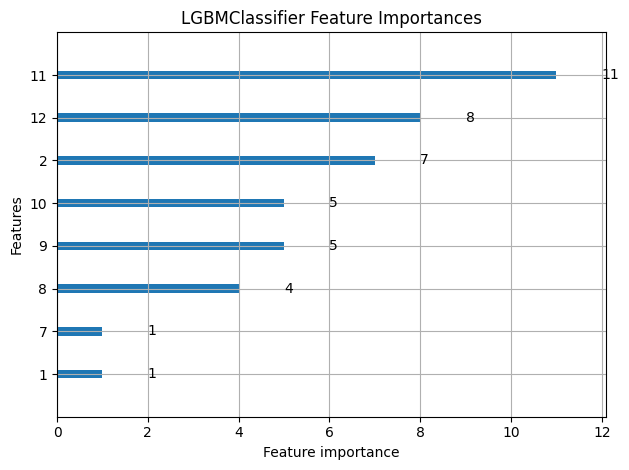

In [58]:
import matplotlib.pyplot as plt
from lightgbm import plot_importance

plot_importance(lt_grid.best_estimator_)
plt.title("LGBMClassifier Feature Importances")
plt.tight_layout()
plt.show()